## Random Forest Classifier

In [16]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv('dataset.csv')
df

,SEQN,GENDER,AGE,HISPANIC_O,SLEEP_HRS,DIASTOLIC,SYSTOLIC,WEIGHT,HEIGHT,BMI,...,DPQ090,SCORE,DEPRESSION,SFHL,HFHL,NDPNDB,NDPDB,DPNDB,DPDB,DPDB_VAL
0,109282.0,1.0,76.0,3.0,7.50,72.666667,139.333333,83.3,177.1,26.6,...,0,5,1.0,10.000,26.666667,0.0,0.0,1.0,0.0,2.0
1,109303.0,1.0,18.0,6.0,8.25,64.666667,101.000000,45.5,159.3,17.9,...,0,1,0.0,-2.500,3.333333,1.0,0.0,0.0,0.0,0.0
2,109321.0,2.0,19.0,4.0,7.00,61.666667,93.333333,83.5,158.7,33.2,...,0,3,0.0,8.750,11.666667,1.0,0.0,0.0,0.0,0.0
3,109330.0,1.0,76.0,6.0,8.00,71.333333,124.333333,61.5,162.5,23.3,...,0,0,0.0,20.000,41.666667,1.0,0.0,0.0,0.0,0.0
4,109382.0,2.0,70.0,1.0,10.25,62.666667,114.000000,91.7,160.1,35.8,...,0,2,0.0,25.625,20.000000,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,...,0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
5906,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,...,0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
5907,93690.0,1.0,32.0,2.0,7.00,62.000000,115.333333,89.5,164.9,32.9,...,0,0,0.0,7.500,10.000000,1.0,0.0,0.0,0.0,0.0
5908,93691.0,1.0,25.0,6.0,8.00,76.000000,112.000000,39.2,136.5,21.0,...,0,0,0.0,3.750,5.000000,1.0,0.0,0.0,0.0,0.0


In [18]:
df[['DPDB_VAL']] = df[['DPDB_VAL']].astype(int)

In [19]:
df.columns

Index(['SEQN', 'GENDER', 'AGE', 'HISPANIC_O', 'SLEEP_HRS', 'DIASTOLIC',
       'SYSTOLIC', 'WEIGHT', 'HEIGHT', 'BMI', 'DIABETES', 'DPQ010', 'DPQ020',
       'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090',
       'SCORE', 'DEPRESSION', 'SFHL', 'HFHL', 'NDPNDB', 'NDPDB', 'DPNDB',
       'DPDB', 'DPDB_VAL'],
      dtype='object')

In [20]:
X = df[['GENDER', 'AGE', 'HISPANIC_O', 'SLEEP_HRS', 'DIASTOLIC','SYSTOLIC', 'WEIGHT', 'HEIGHT', 'BMI', 'SCORE', 'SFHL', 'HFHL']]
dependentVar = 'DPDB_VAL'

y = df[dependentVar].values

In [21]:
X = np.nan_to_num(X)
y = np.nan_to_num(y)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
 

In [23]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=5,
                                 random_state=1,
                                 n_jobs=2)

In [24]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, n_jobs=2, random_state=1)

In [25]:
from sklearn.metrics import accuracy_score
y_pred = forest.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.788


In [26]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Accuracy score:",accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive', average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='macro'))
print("F1 score: ",f1_score(y_test, y_pred, pos_label='positive', average='macro'))

Confusion matrix :
[[885 127   1   0]
 [134 171   1   0]
 [  2   0 261  51]
 [  0   0  59  81]]
Accuracy score: 0.7884940778341794
Precision Score :  0.7162045326984615
Recall Score :  0.7105619486682759
F1 score:  0.71319365187842


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1013
           1       0.57      0.56      0.57       306
           2       0.81      0.83      0.82       314
           3       0.61      0.58      0.60       140

    accuracy                           0.79      1773
   macro avg       0.72      0.71      0.71      1773
weighted avg       0.79      0.79      0.79      1773



Text(69.0, 0.5, 'Truth')

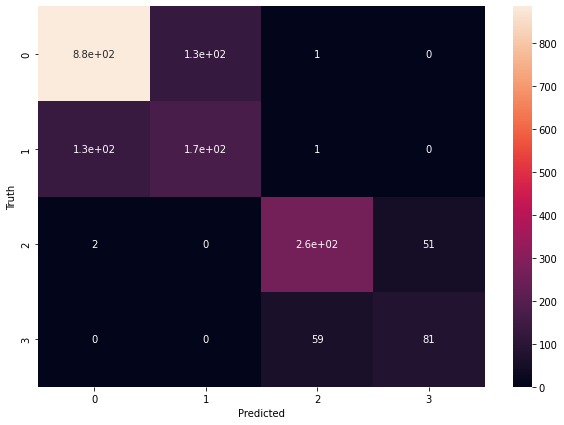

In [28]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
# %matplotlib inline
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(forest, X_test, y_test, display_labels=['Negative', 'Positive'], cmap='Blues', xticks_rotation='vertical')

In [30]:
# %matplotlib inline
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(forest, X_test, y_test, display_labels=['Negative', 'Positive'], cmap='Blues', xticks_rotation='vertical')

In [31]:
from scipy.stats import itemfreq
itemfreq(y_test)

/var/folders/5z/nbnbggz17cd8dhmt_37gyctw0000gn/T/ipykernel_3678/638326954.py:2: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  itemfreq(y_test)


array([[   0, 1013],
       [   1,  306],
       [   2,  314],
       [   3,  140]])

## RANDOM FOREST REGRESSION
## For Predicting Depression 

In [32]:
df = pd.read_csv('dataset.csv')
df

,SEQN,GENDER,AGE,HISPANIC_O,SLEEP_HRS,DIASTOLIC,SYSTOLIC,WEIGHT,HEIGHT,BMI,...,DPQ090,SCORE,DEPRESSION,SFHL,HFHL,NDPNDB,NDPDB,DPNDB,DPDB,DPDB_VAL
0,109282.0,1.0,76.0,3.0,7.50,72.666667,139.333333,83.3,177.1,26.6,...,0,5,1.0,10.000,26.666667,0.0,0.0,1.0,0.0,2.0
1,109303.0,1.0,18.0,6.0,8.25,64.666667,101.000000,45.5,159.3,17.9,...,0,1,0.0,-2.500,3.333333,1.0,0.0,0.0,0.0,0.0
2,109321.0,2.0,19.0,4.0,7.00,61.666667,93.333333,83.5,158.7,33.2,...,0,3,0.0,8.750,11.666667,1.0,0.0,0.0,0.0,0.0
3,109330.0,1.0,76.0,6.0,8.00,71.333333,124.333333,61.5,162.5,23.3,...,0,0,0.0,20.000,41.666667,1.0,0.0,0.0,0.0,0.0
4,109382.0,2.0,70.0,1.0,10.25,62.666667,114.000000,91.7,160.1,35.8,...,0,2,0.0,25.625,20.000000,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,...,0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
5906,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,...,0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
5907,93690.0,1.0,32.0,2.0,7.00,62.000000,115.333333,89.5,164.9,32.9,...,0,0,0.0,7.500,10.000000,1.0,0.0,0.0,0.0,0.0
5908,93691.0,1.0,25.0,6.0,8.00,76.000000,112.000000,39.2,136.5,21.0,...,0,0,0.0,3.750,5.000000,1.0,0.0,0.0,0.0,0.0


In [33]:
X = df[['GENDER', 'AGE', 'HISPANIC_O', 'SLEEP_HRS', 'DIASTOLIC','SYSTOLIC', 'WEIGHT', 'HEIGHT', 'BMI', 'DIABETES', 'SCORE', 'SFHL', 'HFHL']]
dependentVar = 'DEPRESSION'

y = df[dependentVar].values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
 

In [35]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)


In [36]:
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [37]:
from sklearn.metrics import accuracy_score
y_pred = regressor.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 1.000


In [38]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Accuracy score:",accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive', average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='macro'))
print("F1 score: ",f1_score(y_test, y_pred, pos_label='positive', average='macro'))

Confusion matrix :
[[1319    0]
 [   0  454]]
Accuracy score: 1.0
Precision Score :  1.0
Recall Score :  1.0
F1 score:  1.0


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Text(69.0, 0.5, 'Truth')

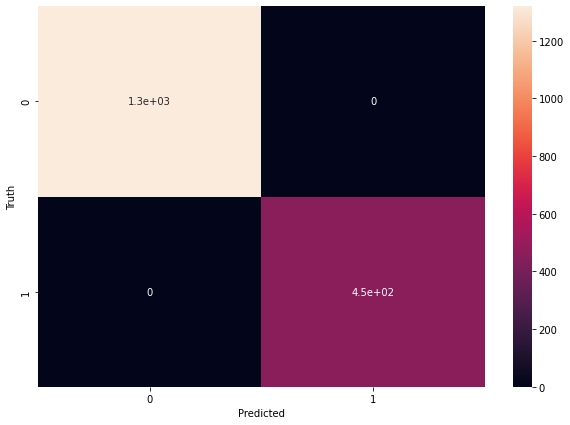

In [39]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [40]:
from scipy.stats import itemfreq
itemfreq(y_test)

/var/folders/5z/nbnbggz17cd8dhmt_37gyctw0000gn/T/ipykernel_3678/638326954.py:2: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  itemfreq(y_test)


array([[0.000e+00, 1.319e+03],
       [1.000e+00, 4.540e+02]])

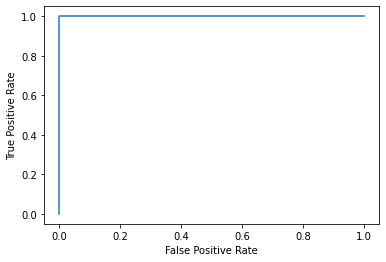

In [41]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

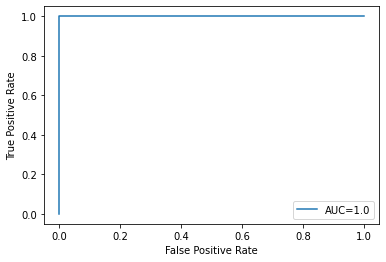

In [42]:
#fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## RANDOM FOREST REGRESSION
## For Predicting Diabetes

In [43]:
df = pd.read_csv('dataset.csv')
df

,SEQN,GENDER,AGE,HISPANIC_O,SLEEP_HRS,DIASTOLIC,SYSTOLIC,WEIGHT,HEIGHT,BMI,...,DPQ090,SCORE,DEPRESSION,SFHL,HFHL,NDPNDB,NDPDB,DPNDB,DPDB,DPDB_VAL
0,109282.0,1.0,76.0,3.0,7.50,72.666667,139.333333,83.3,177.1,26.6,...,0,5,1.0,10.000,26.666667,0.0,0.0,1.0,0.0,2.0
1,109303.0,1.0,18.0,6.0,8.25,64.666667,101.000000,45.5,159.3,17.9,...,0,1,0.0,-2.500,3.333333,1.0,0.0,0.0,0.0,0.0
2,109321.0,2.0,19.0,4.0,7.00,61.666667,93.333333,83.5,158.7,33.2,...,0,3,0.0,8.750,11.666667,1.0,0.0,0.0,0.0,0.0
3,109330.0,1.0,76.0,6.0,8.00,71.333333,124.333333,61.5,162.5,23.3,...,0,0,0.0,20.000,41.666667,1.0,0.0,0.0,0.0,0.0
4,109382.0,2.0,70.0,1.0,10.25,62.666667,114.000000,91.7,160.1,35.8,...,0,2,0.0,25.625,20.000000,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,...,0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
5906,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,...,0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
5907,93690.0,1.0,32.0,2.0,7.00,62.000000,115.333333,89.5,164.9,32.9,...,0,0,0.0,7.500,10.000000,1.0,0.0,0.0,0.0,0.0
5908,93691.0,1.0,25.0,6.0,8.00,76.000000,112.000000,39.2,136.5,21.0,...,0,0,0.0,3.750,5.000000,1.0,0.0,0.0,0.0,0.0


In [44]:
X = df[['GENDER', 'AGE', 'HISPANIC_O', 'SLEEP_HRS', 'DIASTOLIC','SYSTOLIC', 'WEIGHT', 'HEIGHT', 'BMI', 'SCORE','DEPRESSION', 'SFHL', 'HFHL']]
dependentVar = 'DIABETES'

y = df[dependentVar].values

In [45]:
X = np.nan_to_num(X)
y = np.nan_to_num(y)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
 

In [47]:
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators = 10, random_state = 0)


In [48]:
regressor1.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [49]:
from sklearn.metrics import accuracy_score
y_pred = regressor.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.748


/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [50]:
# from sklearn.metrics import explained_variance_score

# explained_variance_score(y_test, y_pred)


In [51]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Accuracy score:",accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive', average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='macro'))
print("F1 score: ",f1_score(y_test, y_pred, pos_label='positive', average='macro'))

Confusion matrix :
[[1327    0]
 [ 446    0]]
Accuracy score: 0.748448956570784
Precision Score :  0.374224478285392
Recall Score :  0.5
F1 score:  0.42806451612903224


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when avera

In [52]:
from scipy.stats import itemfreq
itemfreq(y_test)

/var/folders/5z/nbnbggz17cd8dhmt_37gyctw0000gn/T/ipykernel_3678/638326954.py:2: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  itemfreq(y_test)


array([[0.000e+00, 1.327e+03],
       [1.000e+00, 4.460e+02]])

Text(69.0, 0.5, 'Truth')

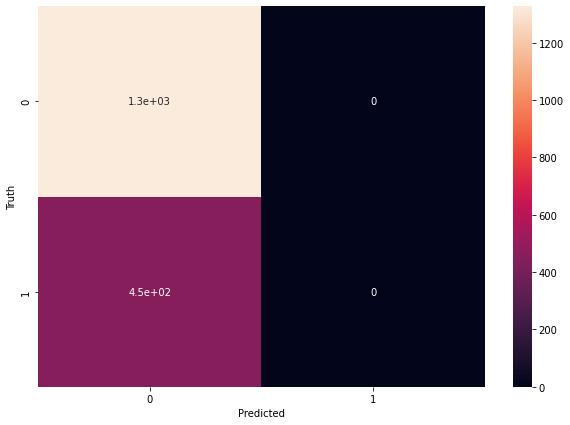

In [53]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

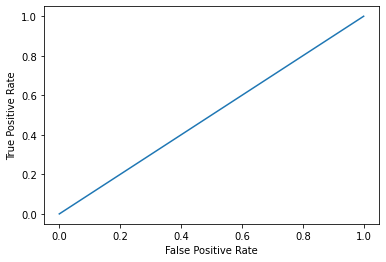

In [54]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

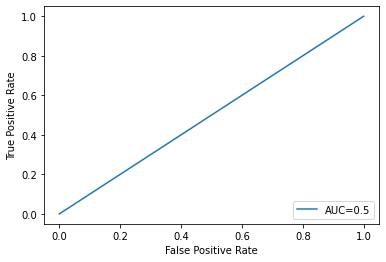

In [55]:
#fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()